# Técnicas de Agrupamento

Fontes:

https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf

https://towardsdatascience.com/hierarchical-clustering-and-its-applications-41c1ad4441a6

https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/

https://towardsdatascience.com/unsupervised-learning-k-means-vs-hierarchical-clustering-5fe2da7c9554

https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

#Conceitos iniciais

## Agrupamento x Classificação

![alt text](https://miro.medium.com/max/700/1*zXHP9bf0rQnOULt9JEyu6w.jpeg)




## Partição

![alt text](https://miro.medium.com/max/700/1*Abcx5kksSYXXaP1AXKFJkg.png)




## Hard x Soft Clustering

![alt text](https://miro.medium.com/max/486/1*HdvxwBbO2aM5hiTG-oxDvA.jpeg)

# K-Means Clustering

## **Agrupamento Particional**

![alt text](https://miro.medium.com/max/596/1*CFW4k0pYMZUBVznPplLOcA.png)



![alt text](https://github.com/andrewxiechina/DataScience/blob/master/K-Means/k4XcapI.gif?raw=true)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

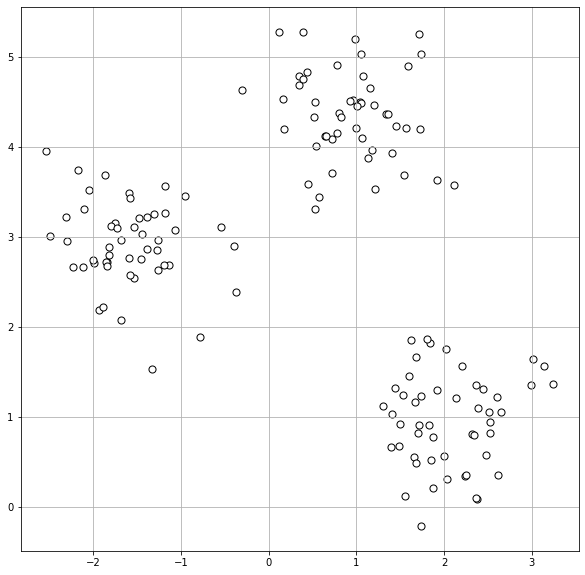

In [2]:
# create dataset
X, y = make_blobs(
    n_samples=150, n_features=2,
    centers=3, cluster_std=0.5,
    shuffle=True, random_state=0
)

# plot
plt.figure(figsize=(10, 10))
plt.scatter(
    X[:, 0], X[:, 1],
    c='white', marker='o',
    edgecolor='black', s=50
)
plt.grid()
plt.show()

In [3]:
def plot_kmeans(cluster_centers, y_km):
  # plot
  plt.figure(figsize=(10, 10))
  plt.scatter(
      X[y_km == 0, 0], X[y_km == 0, 1],
      s=50, c='lightgreen',
      marker='s', edgecolor='black',
      label='cluster 1'
  )
  plt.scatter(
      X[y_km == 1, 0], X[y_km == 1, 1],
      s=50, c='orange',
      marker='o', edgecolor='black',
      label='cluster 2'
  )
  plt.scatter(
      X[y_km == 2, 0], X[y_km == 2, 1],
      s=50, c='lightblue',
      marker='v', edgecolor='black',
      label='cluster 3'
  )
  plt.scatter(
      cluster_centers[:, 0], cluster_centers[:, 1],
      s=250, marker='*',
      c='red', edgecolor='black',
      label='centroids'
  )
  plt.legend(scatterpoints=1)
  plt.grid()
  plt.show()

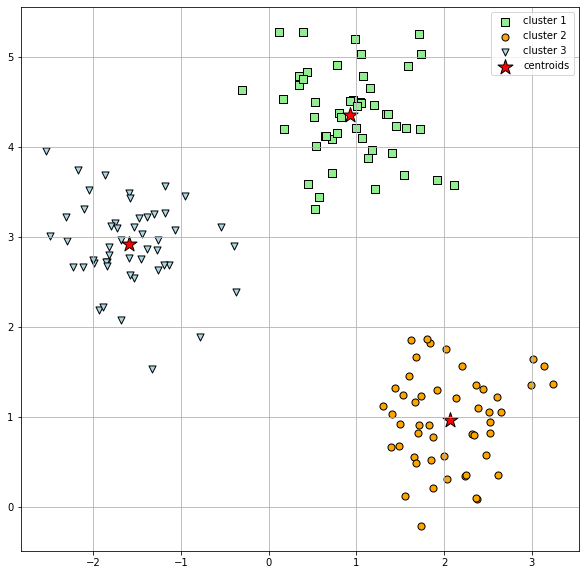

In [4]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
plot_kmeans(km.cluster_centers_, y_km)

## Problema 1:

A qualidade da partição encontrada depende muito da escolha inicial dos centróides iniciais, e essa escolha é aleatória.

[simulador k-means](http://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/).


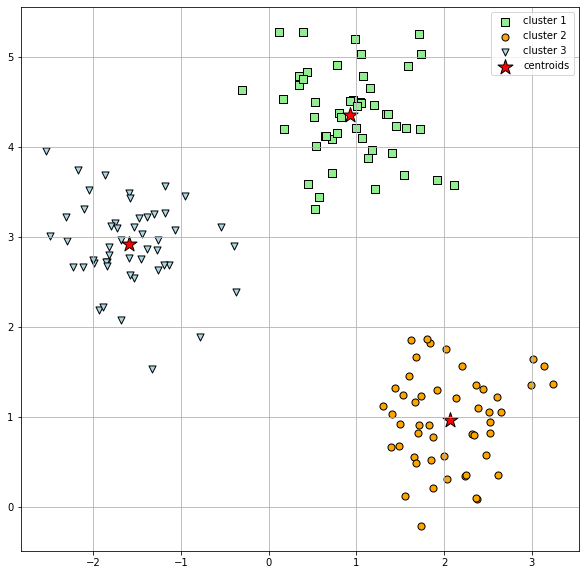

In [5]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=4, 
    tol=1e-04, random_state=2
)
y_km = km.fit_predict(X)
plot_kmeans(km.cluster_centers_, y_km)

### Solução 1: múltiplas inicializações (n_int)*


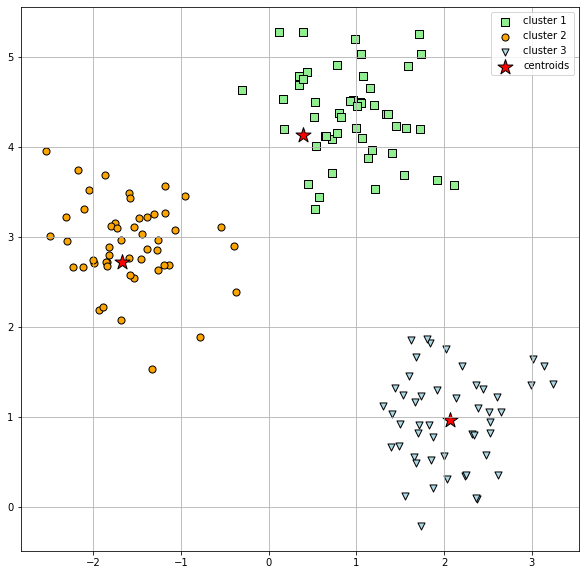

In [6]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=1, 
    tol=1e-04, random_state=2
)
y_km = km.fit_predict(X)
plot_kmeans(km.cluster_centers_, y_km)

### Soução 2: k-means++

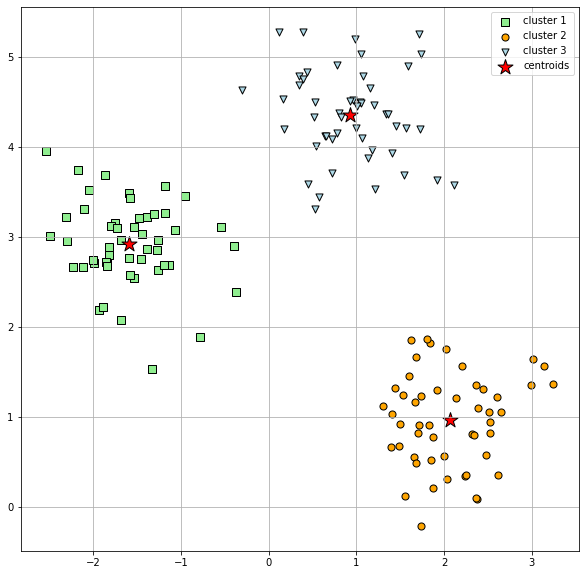

In [7]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='k-means++', # esse cara aqui é um kmeans refinado
                                    # a fim de ter menos iterações para melhorar a sugestão dos primeiros centroides
                                    # gerando um centroide de cada vez. 
    n_init=1, max_iter=1, 
    tol=1e-04, random_state=2
)
y_km = km.fit_predict(X)
plot_kmeans(km.cluster_centers_, y_km)

## Problema 2:

Como definir o número de clusters?

A metrica mais comum para definir é a distancia intra-cluster, a distancia inércia.

Conduto, podemos utilizar o elbow point para melhorar esse resultado. 

Quanto mais o número de grupos, menor sua inércia. Assim, o valor de K é onde ocorre a diferença grande o delta de inercia anterior e posterior. 

### Solução: método do cotovelo + coeficiente de inercia (distância intra-cluster)

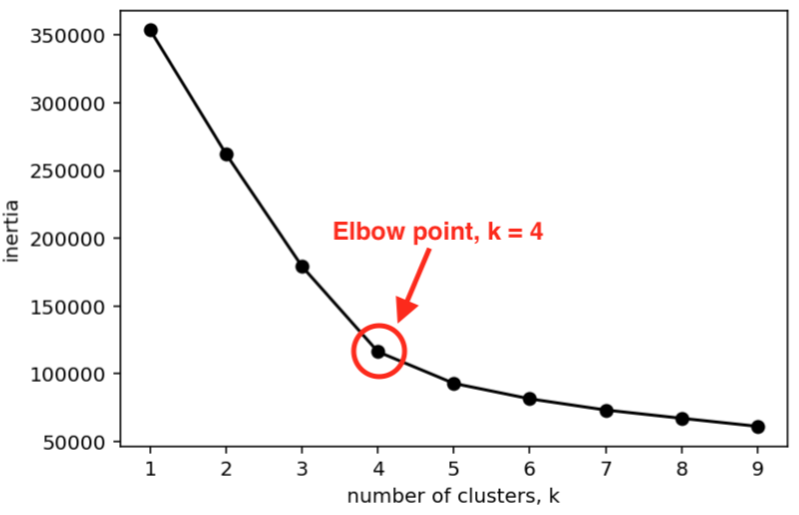

In [8]:
#atualiza o pacote no colab para a identificação do cotovelo funcionar
!pip install yellowbrick --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

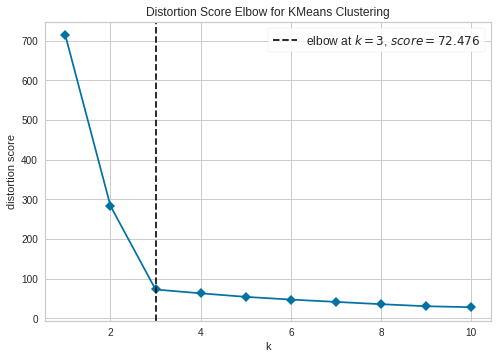

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Instantiate a scikit-learn K-Means model
model = KMeans(
    init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(1,11), metric='distortion', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof() 

### Solução 2: método do cotovelo + coeficiente de silhueta

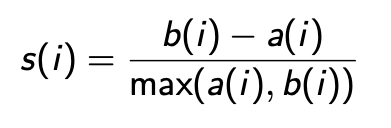

s(i) = Coeficiente de silhueta do ponto **i**

a(i) = Distância média entre o ponto **i** e todos os outros pontos do cluster que **i** pertence

b(i) = Distância média entre o ponto **i** e os pontos do cluster mais próximo

Silhueta com k=2



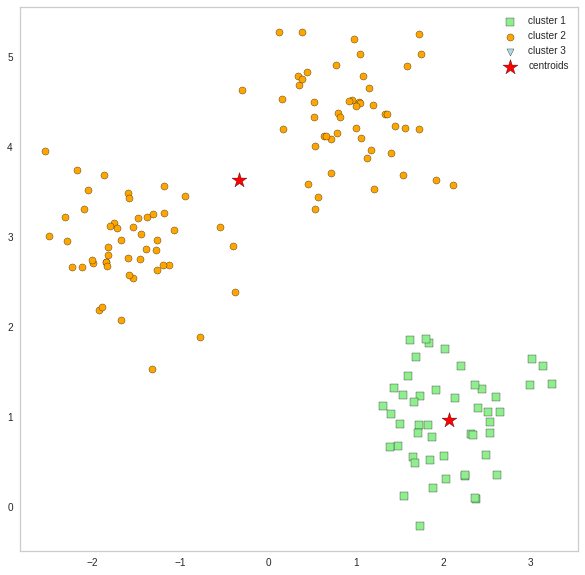

In [11]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

# initialize and fit k-means
km = KMeans(
    n_clusters=2, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
plot_kmeans(km.cluster_centers_, y_km)


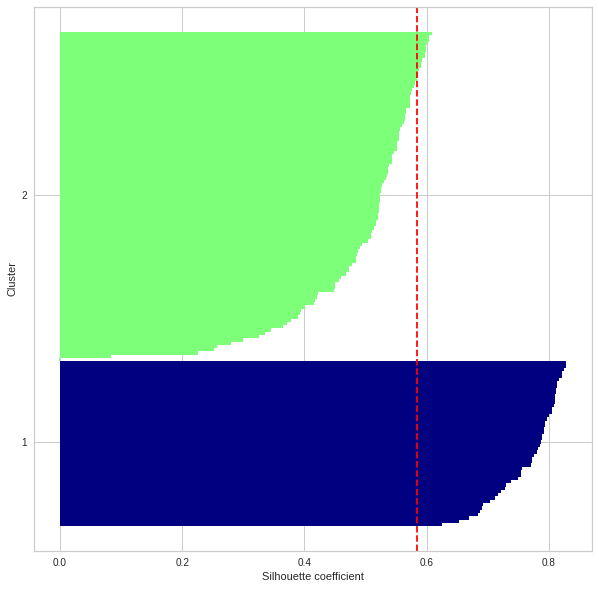

In [12]:
# find cluster labels and number of clusters
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# calculate silhouettes
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# plot silhouette
plt.figure(figsize=(10, 10))
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals, 
        height=1.0, edgecolor='none',
        color=color
     )
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# calculate silhouette score    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

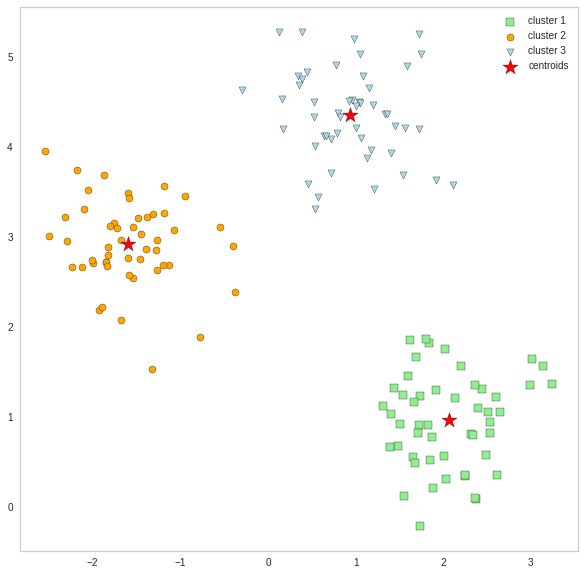

In [13]:
# initialize and fit k-means
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
plot_kmeans(km.cluster_centers_, y_km)



Silhueta com k=2

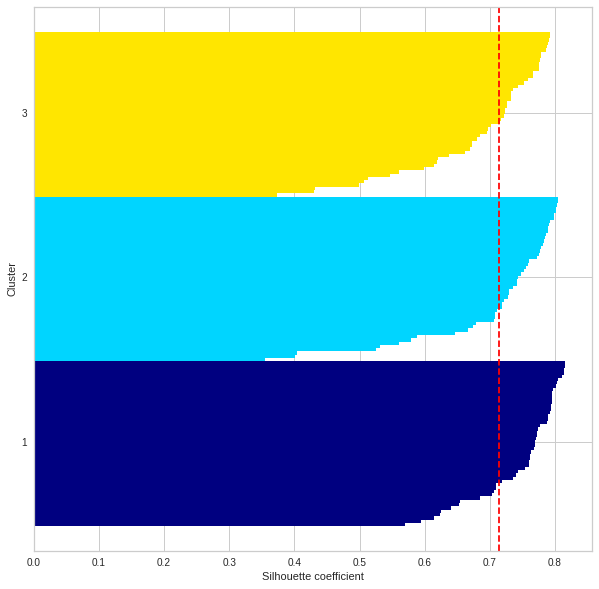

In [14]:
# find cluster labels and number of clusters
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# calculate silhouettes
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# plot silhouette
plt.figure(figsize=(10, 10))
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper), 
        c_silhouette_vals, 
        height=1.0, edgecolor='none', 
        color=color
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

# calculate silhouette score    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

Método do cotovelo + silhueta

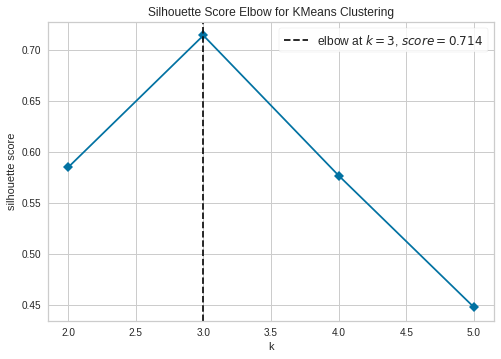

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [15]:
# Instantiate a scikit-learn K-Means model
model = KMeans(
    n_clusters=2, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()   

## [Outro exemplo](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

# Hierarchical Clustering

<img src="https://miro.medium.com/max/875/0*CBb_vzMzxXj0OTpg." width="600" height="400"/>

![alt text](https://miro.medium.com/max/700/1*ET8kCcPpr893vNZFs8j4xg.gif)



**Aplicação:**

[Exemplos de aplicação](https://towardsdatascience.com/hierarchical-clustering-and-its-applications-41c1ad4441a6)

### A construção da estrutura hierárquica pode ser por aglomeração (botton-up) ou por divisão (top-down)


<img src="https://miro.medium.com/max/700/1*PTyc1oCfBWw_OQgkd_LYgQ.png" width="400" height="200" />

<img src="https://miro.medium.com/max/700/1*u95933tR2qj-qhM3WhNdIQ.png" width="400" height="200" />



Diferentemente do K-means, o valor de K não precisa ser definido a *priori*, uma vez que toda a estrutura hieráquica pode ser construída e, através da análise dessa estrutura, o valor de K seja definido.

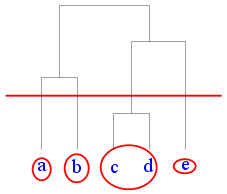


### Linkage

Em ambas as abordagens, a cada iteração, novos conjuntos são formados de modo a garantir que cada conjunto de instâncias seja composto por aquelas com maior similaridade, ou seja, entre as instâncias mais próximas.

Contudo, uma medida de distância por padrão calcula a distância entre dois pontos, mas como calcular a distância entre dois conjuntos de pontos? 

**Single linkage**

<img src="https://miro.medium.com/max/700/1*A-cBLEoYdFEfpdHb0VeXjA.png" width="400" height="200" />

"A distancia entre dois grupos é a menor distancia entre dois pontos pertencentes ao conjunto" 

**Complete linkage**

<img src="https://miro.medium.com/max/700/1*Gdgk7EimCqXCiO32RqXQAg.png" width="400" height="200" />

Ao inves de considerar distancia de borda, esse método é computado com base na maior distancia entre dois pontos pertencentes ao conjunto

**Average linkage**

<img src="https://miro.medium.com/max/700/1*8DyfzvbAWfLASK6778uyNg.png" width="400" height="200" />

é efetivado com base na média das distancias dos todos os pontos de um conjunto com todos os pontos de outro. 

**Ward method**

Nessa estratégia a distância entre dois clusters A e B é definida pelo quanto uma determinada função de custo será piorada (HC aglomerativo) ou melhorada (HC divisivo) com a união/divisão destes clusters. 

A melhor escolha é tomada e passa-se a próxima iteração até alcançar a condição de parada.




<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png" width="600" height="800" />

O principal problema do H.Clustering é que não existe uma fase de ajuste no processo. Não existe uma métrica de auto-critica. 

Não existe aleatoriedade, por isso explorar qual o melhor modelo para o seu problema. 

o single linkage é melhor para quando as zonas de densidades são bem definidas. 

O average vai perfomar melhor no grupo 5 e 6 quando a distribuição mais fluida entre os limites. 

Uma vez que dois pontos foram juntos, não tem exatamente como voltar atrás. 

o Ward é um algoritimo de busca gulosa, ele vai utilizar a metrica de qual a melhor decisão de se tomar, mas não existe ajuste no processo. 

Ele é excelente para bases menores e com caracterização hierárquica.
ex: definir familia de animais

## Exemplo

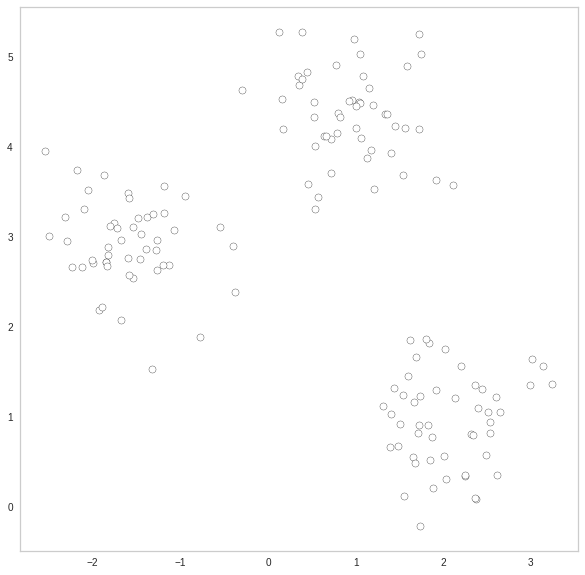

In [27]:

# create dataset
X2, y2 = make_blobs(
    n_samples=150, n_features=2,
    centers=3, cluster_std=0.5,
    shuffle=True, random_state=0
)

# plot
plt.figure(figsize=(10, 10))
plt.scatter(
    X2[:, 0], X2[:, 1],
    c='white', marker='o',
    edgecolor='black', s=50
)
plt.grid()
plt.show()


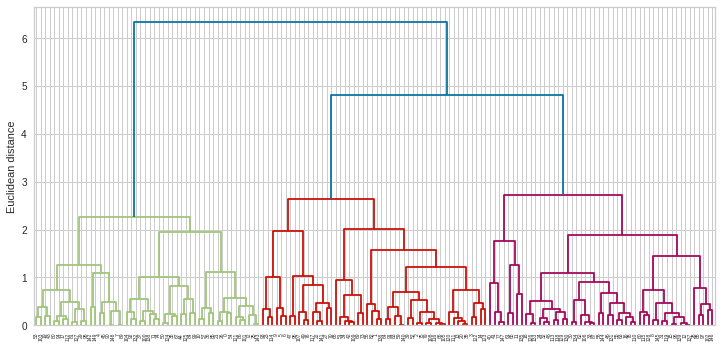

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
row_clusters2 = linkage(X2, method='complete', metric='euclidean')
# plot dendrogram
plt.figure(figsize=(10, 5))
row_dendr = dendrogram(row_clusters2)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [18]:
def plot_hclust(data, y_hc):
  # plot
  plt.figure(figsize=(10, 10))
  plt.scatter(
      data[y_hc == 0, 0], data[y_hc == 0, 1],
      s=50, c='lightgreen',
      marker='s', edgecolor='black',
      label='cluster 1'
  )
  plt.scatter(
      data[y_hc == 1, 0], data[y_hc == 1, 1],
      s=50, c='orange',
      marker='o', edgecolor='black',
      label='cluster 2'
  )
  plt.scatter(
      data[y_hc == 2, 0], data[y_hc == 2, 1],
      s=50, c='lightblue',
      marker='v', edgecolor='black',
      label='cluster 3'
  )
  plt.scatter(
      data[y_hc == 3, 0], data[y_hc == 3, 1],
      s=50, c='lightcoral',
      marker='D', edgecolor='black',
      label='cluster 4'
  )
  plt.legend(scatterpoints=1)
  plt.grid()
  plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


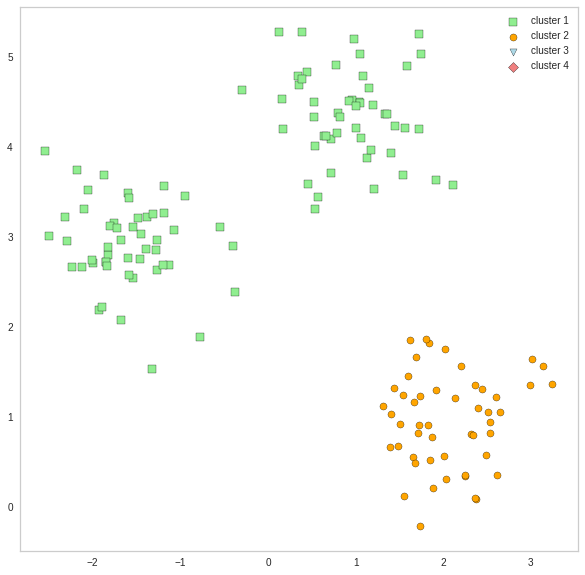

In [19]:
from sklearn.cluster import AgglomerativeClustering

# cluster with k=2
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X2)
#print(f'Cluster labels: {labels}')
plot_hclust(X2, labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


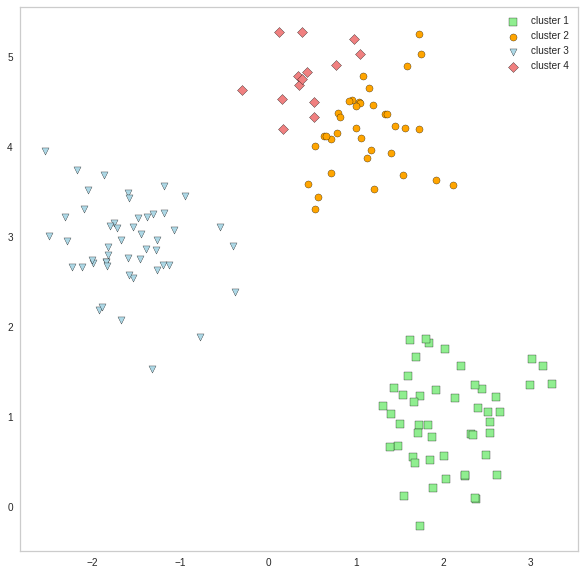

In [20]:
from sklearn.cluster import AgglomerativeClustering

# cluster with k=3
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = ac.fit_predict(X2)
#print(f'Cluster labels: {labels}')
plot_hclust(X2, labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


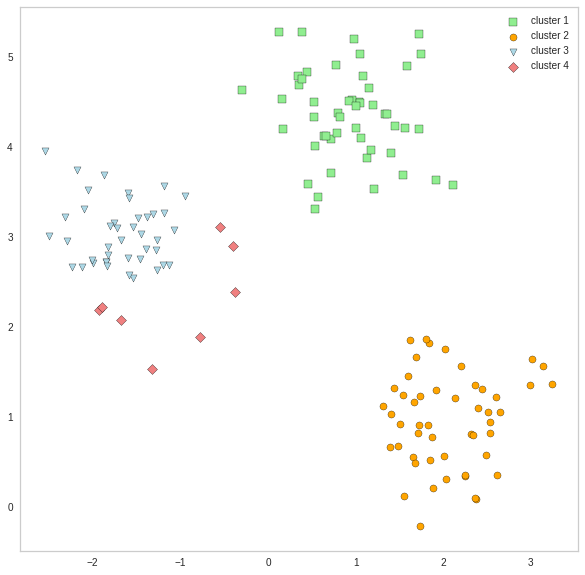

In [21]:
from sklearn.cluster import AgglomerativeClustering

# cluster with k=4
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X2)
#print(f'Cluster labels: {labels}')
plot_hclust(X2, labels)



# DBSCAN

![alt text](https://miro.medium.com/max/875/1*H_FJ3qgKCBr-gzTkFdvIuA.png)

![alt text](https://miro.medium.com/max/875/1*-cKrpiXi1duhjeLZjocanw.jpeg)

![alt text](https://miro.medium.com/max/675/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

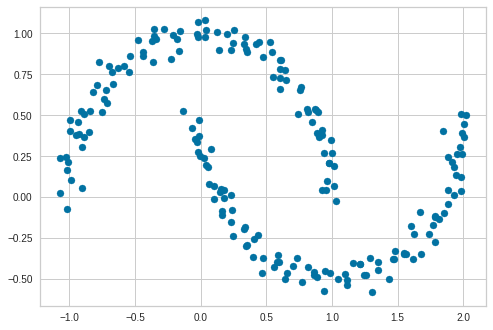

In [22]:
from sklearn.datasets import make_moons

# create make_moons dataset
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


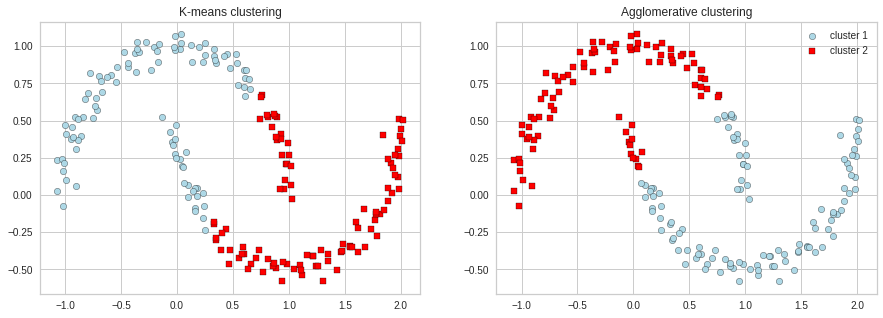

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# initialze and fit with kmeans
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

# plot
ax1.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    c='lightblue', edgecolor='black',
    marker='o', s=40,
    label='cluster 1'
)
ax1.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    c='red', edgecolor='black',
    marker='s', s=40,
    label='cluster 2'
)
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(
    n_clusters=2,
    affinity='euclidean',
    linkage='complete'
)

# fit with AgglomerativeClustering
y_ac = ac.fit_predict(X)

# plot
ax2.scatter(
    X[y_ac == 0, 0], X[y_ac == 0, 1],
    c='lightblue', edgecolor='black',
    marker='o', s=40,
    label='cluster 1'
)
ax2.scatter(
    X[y_ac == 1, 0], X[y_ac == 1, 1],
    c='red', edgecolor='black',
    marker='s', s=40,
    label='cluster 2'
)
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.show()

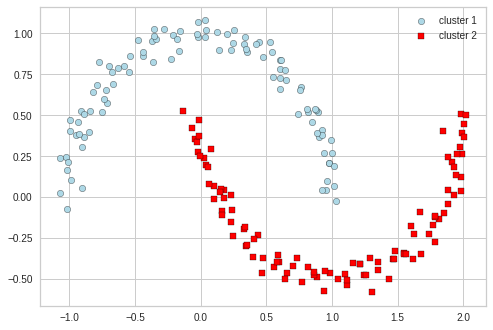

In [24]:
from sklearn.cluster import DBSCAN

# initialize and fit DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

# plot
plt.scatter(
    X[y_db == 0, 0], X[y_db == 0, 1],
    c='lightblue', edgecolor='black',
    marker='o', s=40,
    label='cluster 1'
)
plt.scatter(
    X[y_db == 1, 0], X[y_db == 1, 1],
    c='red', edgecolor='black',
    marker='s', s=40,
    label='cluster 2'
)
plt.legend()
plt.show()

## Outros algoritmos

Consulte [aqui](https://scikit-learn.org/stable/modules/clustering.html) para conhecer mais alguns algoritmos de agrupamento implementados no sklearn